<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Spectral_Normalization_for_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spectral Normalization for Generative Adversarial Networks**

논문 링크: https://arxiv.org/abs/1802.05957

논문을 보기 전에 립시츠 함수와 립시츠상수, Singular value decomposition(SVD),  Matrix norm를 알고 있으면 이해하기 훨씬 수월해진다.

GAN의 성능은 당연하게도 discriminator의 성능에 따라 크게 좌지우지된다, 따라서 discriminator의 성능을 컨트롤하는 것이 매우 중요하다고 볼 수 있다. 하지만 high dimensional space일 경우 이는 더더욱 어려워진다. 만약 이러한 문제로 인해 discriminator가 학습하는동안 부정확한 estimation을 내놓고 불안정하게 되면 generator는 target distribution을 학습하는데 어려움을 겪는다. 심지어 model distribution의 support(https://en.wikipedia.org/wiki/Support_(mathematics) )와 target distribution의 support이 겹치는부분이 없게되면 discriminator가 target과 model distribution을 완벽하게 구분해내게 됩니다. 즉, 더이상 학습을 하지 않는 상태가 되는것이다.

따라서 본 논문에서는 Discriminator의 학습을 안정화(stabilize)시키기위해서 새로운 weight normalization 기법인 **Spectral Normalization**을 소개한다. 그리고 이를 통해 **최초로 단일 네트워크로 IMAGENET dataset의 1000개 범주의 이미지를 생성**해냈다.

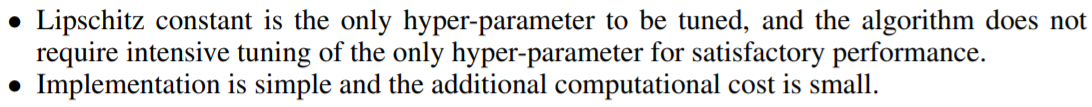

위와 같이 이 기법은 다른 기법 대비 장점이 2가지가 있다. 첫번째는 Lipschitz 상수만 튜닝하면 되는데 그렇게 열심히 튜닝을 안해도 좋은 결과가 나온다. 두번째는 구현이 간단하며 연산량이 적다는 것이다.

## **Spectral Normalization**

### **Theoretical Groundwork**

먼저 Spectral Normalization의 이론적인 배경부터 알아보겠다.

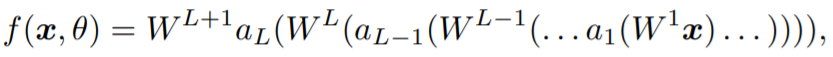

위의 식은 그냥 단순히 layer들과 activation function을 함수로써 표현해놓은 식이다. (간편성을 위해 bias는 생략)

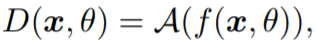

그리고 discriminator의 최종 output은 위의 식과 같이 된다.

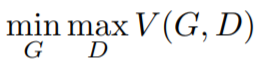

그리고 기본적인 GAN 공식(minimax game)은 위와 같다.

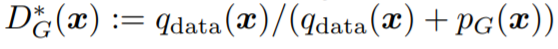

아까 위에서 본 기본 GAN의 minimax문제에서 알 수 있듯이, 학습을 할 때에 D에대해 max인 , 즉 optimal한 D를 가정하고 학습을 진행하게 된다.

이러한 optimal한 D의 형태는 fix된 G에 대해서 위의 식과 같이 주어진다. (이 부분이 이해가 안된다면 WGAN을 보고 오면 도움이 될 것이다.)

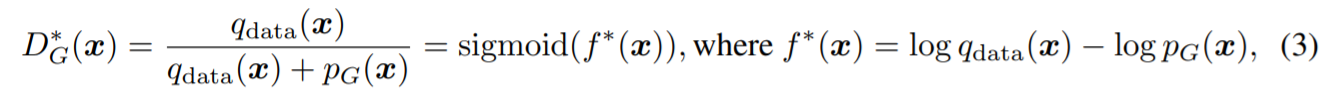

그리고 또 방금 본 식은 위와 같이 표현이 가능하다. 위의 식에서 f는 단순히 sigmoid에 넣었을 시 방금 본 식과 같이 optimal한 D의 형태가 나오게 만드는 함수이다. 즉, 바꿔말해 optimal한 D가 나올려면 f가 저렇게 생겨야 한다는 것이다.

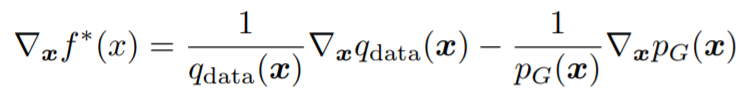

이때 f의 도함수의 식은 위의 식과 같이 된다. 하지만 이 식은 **unbounded 되어있으며 계산이 불가능**하다. 따라서 이것에 제약을 걸어주는 무언가가 필요하다.

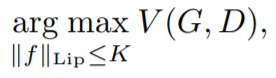

바로 위와 같이 Lipschitz contant를 조절하는 것이다. f의 도함수 식에서 알 수 있는 unbounded 되었다는 말은 곧 이 함수는 Lipschitz continuty하지 않다는 뜻이며 이는 즉, Lipschitz constant가 unbounded 되어있다는 것이다. 따라서 위와 같이 Lipschitz contant를 조절하여 Lipschitz constant를 bounded하게 만들어 D의 gradient가 폭발하는 것을 막아준다. 즉, Lipschitz norm을 K 이하로 제약을 거는 것이다.

### **Spectral Normalization**

위에서 계속 언급했듯이 SN은 discriminator 함수 f의 **Lipschitz constant를 컨트롤**하기 위해 사용된다. 말 그대로 각각의 layer(g : h_in -> h_out)의 spectral norm에 제약을 거는 것이다.

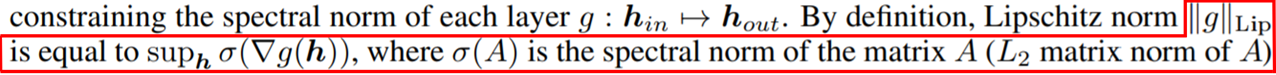

정의에 의해 Lipschitz norm은 위와 같이 표현이 된다. 단순히 Lipshitz norm 정의에 의해 g의 미분값의 norm에 대한 상한(supremum)을 수식으로 써놓은 것이다.

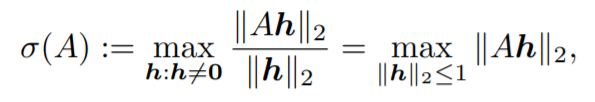

추가적으로 matrix A의 L2 matrix norm이 A의 largest singular value로 나타난다는 것을 위의 식과 같이 표현해놨다. 이 부분이 이해가 안가면 **matrix norm**을 보고 오면 쉽게 이해가 된다.

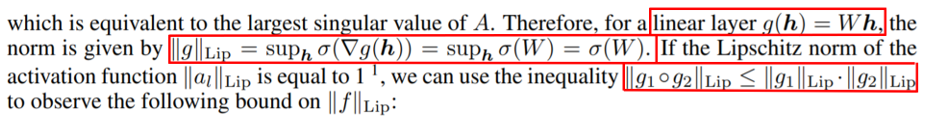

linear layer인 g를 위의 첫번째 빨간색 네모칸과 같이 표현할 수 있다. 이때 W는 weight metrix이며, h는 layer(g)에 들어갈 input이다. g가 저렇게 표현되므로 g의 Lipschitz norm은 두번째 빨간색 네모칸과 같이 표현이 가능하다. 이처럼 g의 Lipschitz norm은 단순히 W의 largest singular value 값으로 나타낸다. 그리고 마지막으로 자주 사용되는 ReLU나 LeakyReLU 등은 모두 Lipschitz norm이 1이기 때문에 Lipschitz norm이 1인 activation function을 쓸 때 세번째 빨간색 네모칸과 같은 성질을 이용할 수 있다.

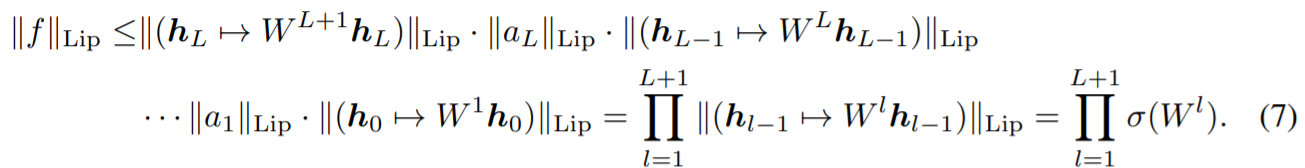

f의 Lipschitz norm은 위의 식과 같이 표현이 된다. 위의 ||f||의 오른쪽 항들은 단순히 연속적인 layer와 activation function들의 곱을 위에서 본 세번째 빨간색 네모칸과 같은 성질을 통해 나타낸 것이다. 그리고 그 다음 항은 activation function a의 Lipschitz norm이 1이므로 이를 생략해놓은 것이다. 그리고 이전의 값이 g_l의 Lipschitz norm이므로 이를 W의 largest singular value로 나타낼 수 있는데, 이를 통해 식으로 표현한 것이 마지막 항이다.

결과적으로 각 weight matrix인 W의 spectral norm(w의 largest singular vlaue)값을 조절하면 D의 함수인 f에 Lipschitz norm에 제약을 걸 수 있게 된다.

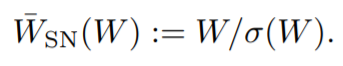

g의 Lipschitz constant인 σ(W) (W의 spectral norm)이 1이 되도록 normalize를 해주게 된다. 그렇다면 모든 layer의 weight matrix(W_l)을 spectral normalization해 준다면, (7) 식에서 f의 Lipschitz norm이 1이하로 bounded된다는 것을 알 수 있다.

### **GRADIENT ANALYSIS OF THE SPECTRALLY NORMALIZED WEIGHTS**

지금까지 spectral normalize에 대한 방법을 알아봤으니, 이번에는 이러한 기법을 어떻게 적용하고 적용시 어떤 영향을 주는지에 대해 알아보겠다.

w가 어떻게 학습하는지와 spectral normalization이 주는 영향에 대해 알기 위해 weight matrix W에 대해서 GAN의 목적함수 V(G,D)의 gradient를 살펴보겠다.

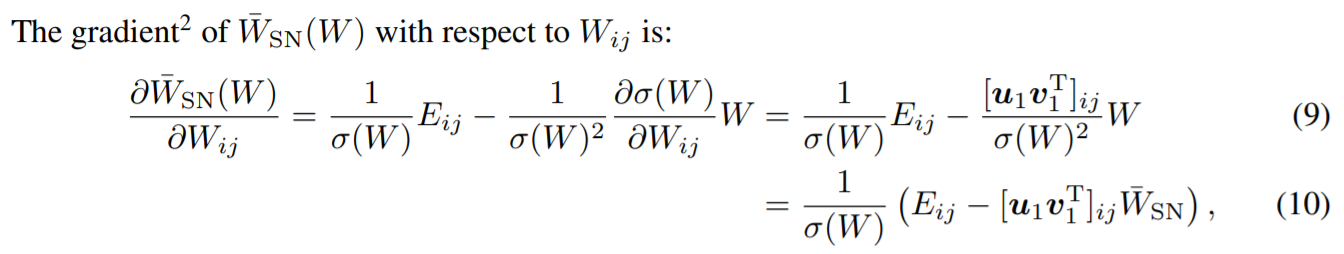

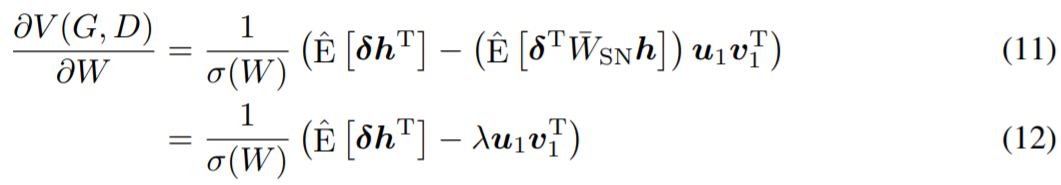